In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import planarity
from networkx.algorithms import community
# import make_mst
# import make_pmfg
import collections
import os

In [2]:

def entropy(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print(degree_sequence)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    pros = np.matrix(np.array(cnt))/sum(cnt)

    etp = -pros*np.log(pros).T
    # print(float(etp[0]))
    return float(etp[0])


In [5]:
file_name = os.listdir('graph_info')
# file_name

In [9]:
entropy_l_pmfg = []
t0 = time.time()
for i in file_name:
    pmfg = nx.read_gpickle(f'graph_info/{i}')
    etp = entropy(pmfg)
    entropy_l_pmfg.append(etp)
print('time used: ', time.time()-t0)

time used:  0.15056705474853516


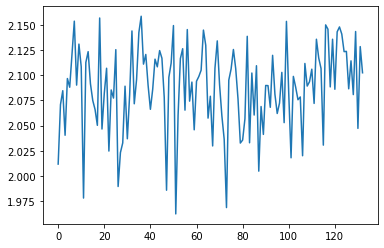

In [10]:
plt.plot(entropy_l_pmfg)